# S07 T01: Tasca del test d'hipòtesis
## Descripció

Aprèn a realitzar test d'hipòtesis amb Python.
## Nivell 1
### - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Ho: Cilindrada mes gran, mes co2.
Ha: Cilindrada mes gran, menys co2.

In [2]:
df=pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


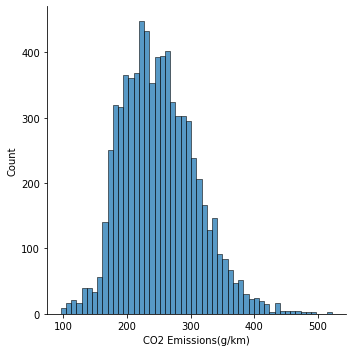

In [4]:
temp=df[df['CO2 Emissions(g/km)'].notna()]['CO2 Emissions(g/km)']
sns.displot(temp)

Miramos la normalidad de la distribucion primero con un test grafico Q-Q

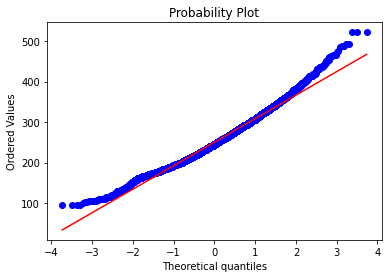

In [5]:
import numpy as np
import pylab
import scipy.stats as stats

stats.probplot(df['CO2 Emissions(g/km)'],dist="norm",plot=pylab)
pylab.show()

Parece que la distribucion se aleja de la normalidad sobretodo en los extremos, como la grafica de barras ya dejaba intuir

Verificamos con un boxplot

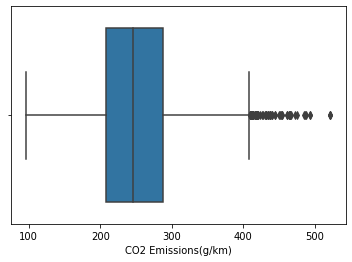

In [6]:
ax = sns.boxplot(x=df['CO2 Emissions(g/km)'])

La media no se encuentra centrada asi que habra que normalizar

Pero intentamos ver numericamente con el test de Shapiro el grado de normalida

In [9]:
stat, p = stats.shapiro(df['CO2 Emissions(g/km)'])
print('stats=%.5f,p=%.50f'%(stat,p))

stats=0.98380,p=0.00000000000000000000000000031725287861619494393039


Parece que con un p-value tan pequeño podemos asumir que la distribucion no cumple la hipotesis nulla y no es una distribucion gausiana 

In [ ]:
verificamos con chi cuardado

In [10]:
stat,p = stats.normaltest(df['CO2 Emissions(g/km)'])
print('stats=%.5f,p=%.50f'%(stat,p))

stats=349.52381,p=0.00000000000000000000000000000000000000000000000000


Pobamos con jarque-bera ya que temos una gran cantidad de datos mas de 2000

In [11]:
stat,p = stats.jarque_bera(df['CO2 Emissions(g/km)'])
print('stats=%.5f,p=%.50f'%(stat,p))

stats=410.73288,p=0.00000000000000000000000000000000000000000000000000


## Nivell 2

## - Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

## Nivell 3
## - Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.